# Plotting radial hydrogen orbitals with sympy
This notebook, loosely inspired on https://ojensen.wordpress.com/2010/08/10/fast-ufunc-ish-hydrogen-solutions/, plots some radial hydrogen functions using sympy, as support for Chapter 2 of the Building Blocks of Matter course at Leiden University.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sympy.physics.hydrogen import R_nl
from sympy import var, simplify
from sympy import init_printing
from sympy.utilities.lambdify import lambdify
from sympy import integrate, oo
from scipy.constants import hbar, alpha, Rydberg, c

In [2]:
init_printing()

plt.rcParams['axes.xmargin'] = 0
plt.rcParams['figure.figsize'] = [8,6]

cmap = matplotlib.cm.get_cmap('tab20c')

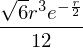

In [3]:
var('n l r')
R_nl(2,1,r,1)*r**2

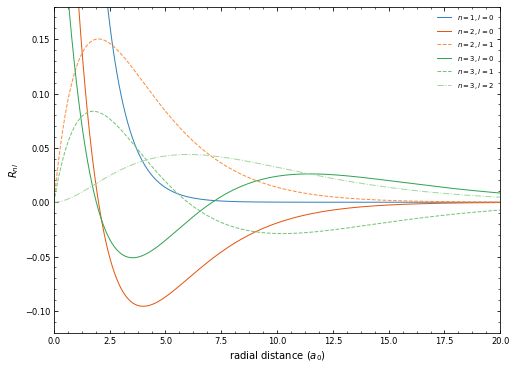

In [4]:
x_np = np.linspace(0, 20, 200)
linestyles = ['-', '--', '-.', ':']

Z = 1

for n_np in range(1,4):
    for l_np in range(0,n_np):
        plt.plot(x_np,lambdify(r, R_nl(n_np, l_np, r, Z))(x_np), 
                 color=cmap(4*n_np-4+l_np),
                 linestyle=linestyles[l_np],
                 label="$n = {}, l = {}$".format(n_np, l_np))
plt.ylim([-0.12, 0.18])
plt.xlabel('radial distance ($a_0$)')
plt.ylabel('$R_{nl}$')
plt.legend()
plt.show()

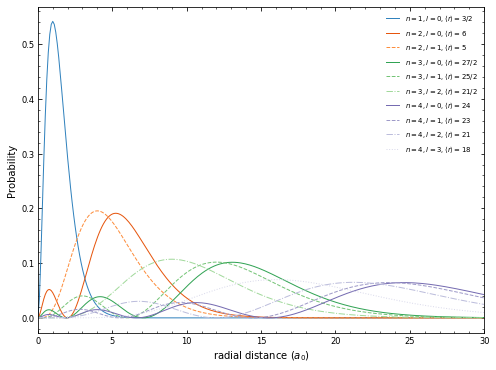

In [5]:
x_np = np.linspace(0, 30, 300)
for n_np in range(1,5):
    for l_np in range(0,n_np):
        expected_r = integrate(r * R_nl(n_np, l_np, r, 1)**2 * r**2, (r,0,oo))
        plt.plot(x_np, lambdify(r, R_nl(n_np, l_np, r, 1)**2 * r**2)(x_np), 
                 color=cmap(4*(n_np-1) + l_np),
                 linestyle=linestyles[l_np],
                 label=r"$n = {}, l = {}, \langle r \rangle = {}$".format(n_np, 
                                                                           l_np,
                                                                           expected_r))
plt.xlabel('radial distance ($a_0$)')
plt.ylabel('Probability')
plt.legend()
plt.show()

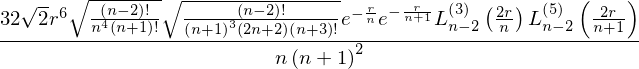

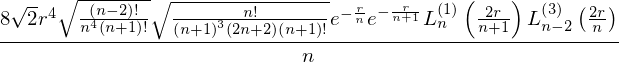

In [6]:
# Investigate the Transition amplitudes for the sharp and diffuse transitions
diffuse = R_nl(n, 1, r, 1) * r * R_nl(n+1, 2, r, 1) * r**2
sharp = R_nl(n, 1, r, 1) * r * R_nl(n+1, 0, r, 1) * r**2
display(diffuse)
display(sharp)

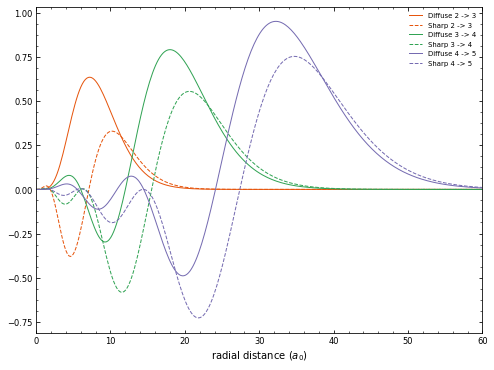

In [7]:
for n_np in [2, 3, 4]:
    plt.plot(x_np*2, lambdify(r, diffuse.subs({n: n_np}))(x_np*2), 
             color=cmap(4*(n_np-1)),
             label='Diffuse {} -> {}'.format(n_np, n_np+1))
    plt.plot(x_np*2, lambdify(r, sharp.subs({n: n_np}))(x_np*2),
             color=cmap(4*(n_np-1)),
             linestyle='--',
             label='Sharp {} -> {}'.format(n_np, n_np+1))
plt.xlabel('radial distance ($a_0$)')
plt.legend()
plt.show()

In [8]:
for n_np in [2, 3, 4]:
    print("Transition amplitude diffuse {} -> {}: {:2f}".format(n_np, 
                                                                n_np+1,
                                                                float(integrate(diffuse.subs({n: n_np}), (r,0,oo)))))
    print("Transition amplitude sharp {} -> {}: {:2f}".format(n_np, 
                                                              n_np+1,
                                                              float(integrate(sharp.subs({n: n_np}), (r,0,oo)))))

Transition amplitude diffuse 2 -> 3: 4.747992
Transition amplitude sharp 2 -> 3: 0.938404
Transition amplitude diffuse 3 -> 4: 7.565411
Transition amplitude sharp 3 -> 4: 2.443534
Transition amplitude diffuse 4 -> 5: 11.038943
Transition amplitude sharp 4 -> 5: 4.600278
